#Importing Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay

In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
 "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
 "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
 "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
 "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
Data = pd.read_csv(url, names=names)

In [44]:
Data.shape

(569, 32)

In [45]:
X=Data[['radius_mean', 'texture_mean','diagnosis']]

#Visualize the data

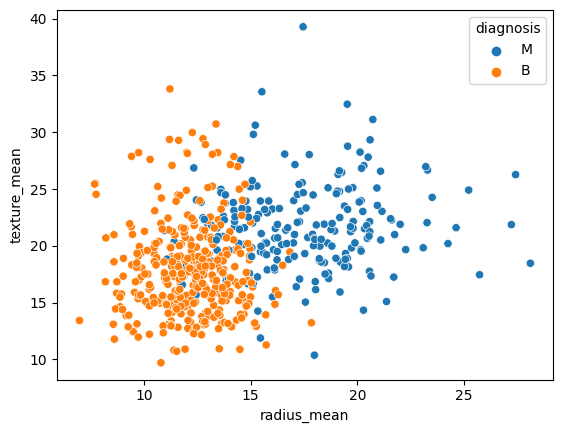

In [46]:
sns.scatterplot(data=X,x='radius_mean',y= 'texture_mean', hue='diagnosis')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X[['radius_mean', 'texture_mean']], X['diagnosis'], test_size=0.2, random_state=42)

In [48]:
def Get_DB(X,y,name,model):
  y_hat_mod=np.array([0 if y.iloc[i]=='B' else 1 for i in range(len(y))])
  fig, ax = plt.subplots(figsize=(8, 6))
  DecisionBoundaryDisplay.from_estimator(model,X[['radius_mean', 'texture_mean']],cmap=plt.cm.RdYlBu,response_method="predict",ax=ax,xlabel="radius_mean",ylabel="texture_mean")
  for i, color in zip(range(2), 'rb'):
    idx = np.where(y_hat_mod == i)
    plt.scatter(
    X.iloc[idx[0], 0],
    X.iloc[idx[0], 1],
    c=color,
    cmap=plt.cm.RdBu,
    edgecolor="black",
    s=15)
  plt.title(f"Decision boundary Best hyparamter for {name}")
  plt.show()

In [49]:
def GRS(model,param_grid,X_train,y_train):
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
  grid_search.fit(X_train, y_train)
  return {'Best_depth': grid_search.best_params_['max_depth'],'Best_accuracy': grid_search.best_score_},grid_search.best_estimator_

## For criterion Gini

In [50]:
R,M_gini=GRS(DecisionTreeClassifier(random_state=42,criterion='gini'),{'max_depth':[1,2,3,4,5,6,7]},X_train,y_train)

In [51]:
R

{'Best_depth': 3, 'Best_accuracy': 0.8857142857142858}

In [52]:
#Predict on test set
y_hat=M_gini.predict(X_test)

In [69]:
1-M_gini.score(X_test,y_test)#Test error (1-Accuracy)

0.08771929824561409

In [53]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           B       0.94      0.92      0.93        71
           M       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [54]:
Gini=pd.DataFrame(classification_report(y_test,y_hat,output_dict=True))
Gini.to_csv('Gini.csv')
Gini

,B,M,accuracy,macro avg,weighted avg
precision,0.942029,0.866667,0.912281,0.904348,0.913603
recall,0.915493,0.906977,0.912281,0.911235,0.912281
f1-score,0.928571,0.886364,0.912281,0.907468,0.912651
support,71.000000,43.000000,0.912281,114.000000,114.000000


<ipython-input-48-d4ed12374bbe>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


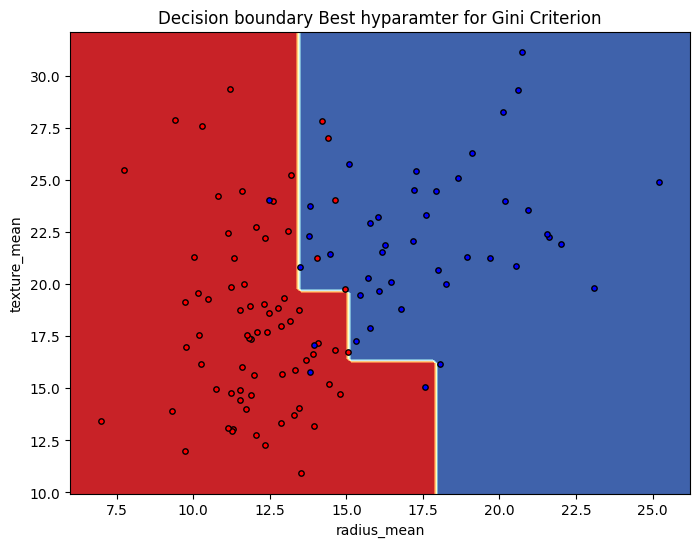

In [55]:
Get_DB(X_test,y_test,'Gini Criterion',M_gini)

##For criterion Entropy

In [56]:
R,M_ent=GRS(DecisionTreeClassifier(random_state=42,criterion='entropy'),{'max_depth':[1,2,3,4,5,6,7]},X_train,y_train)

In [57]:
R

{'Best_depth': 1, 'Best_accuracy': 0.8791208791208792}

In [58]:
#Predict on test set
y_hat_ent=M_ent.predict(X_test)

In [68]:
1-M_ent.score(X_test,y_test)#Test error (1-Accuracy)

0.07017543859649122

In [59]:
print(classification_report(y_test,y_hat_ent))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95        71
           M       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [60]:
Ent=pd.DataFrame(classification_report(y_test,y_hat_ent,output_dict=True))
Ent.to_csv('Ent.csv')
Ent

,B,M,accuracy,macro avg,weighted avg
precision,0.909091,0.972973,0.929825,0.941032,0.933187
recall,0.985915,0.837209,0.929825,0.911562,0.929825
f1-score,0.945946,0.900000,0.929825,0.922973,0.928615
support,71.000000,43.000000,0.929825,114.000000,114.000000


<ipython-input-48-d4ed12374bbe>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


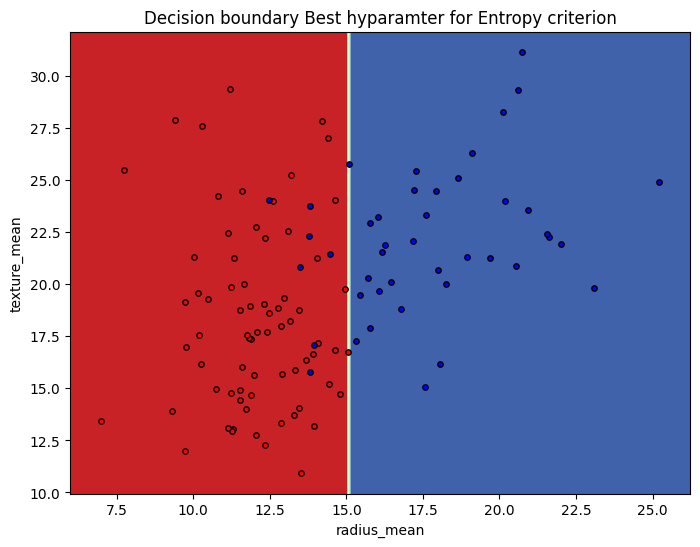

In [61]:
Get_DB(X_test,y_test,'Entropy criterion',M_ent)

##For criterion logloss

In [62]:
R,M_ll=GRS(DecisionTreeClassifier(random_state=42,criterion='log_loss'),{'max_depth':[1,2,3,4,5,6,7]},X_train,y_train)

In [63]:
#Predict on test
y_hat_ll=M_ll.predict(X_test)

In [67]:
1-M_ll.score(X_test,y_test)#Test error (1-Accuracy)

0.07017543859649122

In [64]:
print(classification_report(y_test,y_hat_ll))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95        71
           M       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [65]:
ll=pd.DataFrame(classification_report(y_test,y_hat_ll,output_dict=True))
ll.to_csv('ll.csv')
ll

,B,M,accuracy,macro avg,weighted avg
precision,0.909091,0.972973,0.929825,0.941032,0.933187
recall,0.985915,0.837209,0.929825,0.911562,0.929825
f1-score,0.945946,0.900000,0.929825,0.922973,0.928615
support,71.000000,43.000000,0.929825,114.000000,114.000000


<ipython-input-48-d4ed12374bbe>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


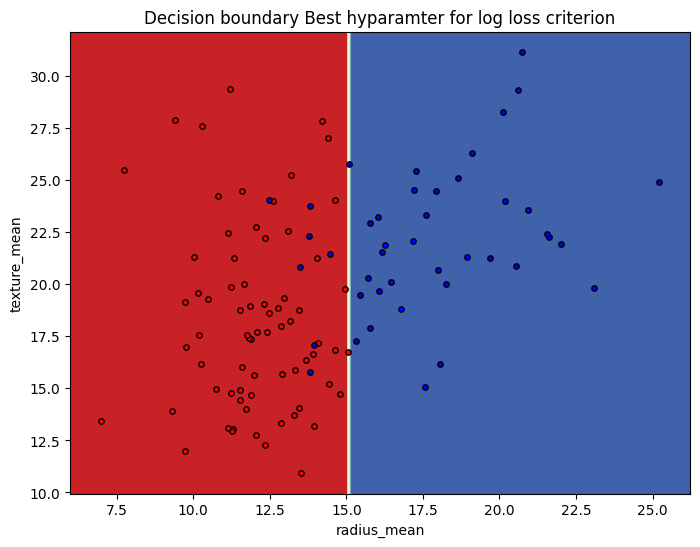

In [66]:
Get_DB(X_test,y_test,'log loss criterion',M_ll)

## Entropy and Log loss are outperforming the Gini.

#End of Code